# 📊 Sesi 3 - Notebook 1
# Matplotlib & Seaborn Fundamentals

Notebook ini mengikuti konten `slides/03_session3_visualization.md` (bagian Matplotlib & Seaborn) sehingga peserta bisa langsung mempraktikkan materi di kelas.

## 🎯 Tujuan Pembelajaran
- Mengenali perbedaan peran Matplotlib (low-level) dan Seaborn (statistical)
- Membuat chart dasar: bar, histogram, pie, line
- Menggunakan chart statistik: box, violin, count plot, heatmap, scatter
- Menyesuaikan styling & palet warna
- Menyusun mini-dashboard 2x2
- Mengekspor visualisasi berkualitas presentasi

## 🗓️ Agenda Singkat
| Waktu | Fokus |
|-------|-------|
| 15:45 - 16:00 | Setup & Matplotlib Basics |
| 16:00 - 16:20 | Bar / Histogram / Pie / Line |
| 16:20 - 16:35 | Seaborn Statistical Plots |
| 16:35 - 16:45 | Heatmap & Scatter Styling |
| 16:45 - 16:55 | Subplots + Export |
| 16:55 - 17:00 | Latihan Mandiri |

## 🛠️ Setup Lingkungan
```bash
uv sync
uv run jupyter notebook

# atau manual
python -m venv .venv
source .venv/bin/activate  # macOS/Linux
.venv\Scripts\activate   # Windows
pip install pandas numpy matplotlib seaborn
```

In [1]:

import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
sns.set_theme(style='whitegrid', palette='husl')

print(f"Matplotlib version: {plt.matplotlib.__version__}")
print(f"Seaborn version: {sns.__version__}")
print(f"Pandas version: {pd.__version__}")

Matplotlib version: 3.10.7
Seaborn version: 0.13.2
Pandas version: 2.3.3


## 📁 Load Dataset RUP 2025

In [2]:

DATASET_FILENAME = 'RUP-PaketPenyedia-Terumumkan-2025.parquet'
candidate_paths = [
    Path('../../../datasets/rup') / DATASET_FILENAME,
    Path('../../datasets/rup') / DATASET_FILENAME,
    Path('../datasets/rup') / DATASET_FILENAME,
    Path('datasets/rup') / DATASET_FILENAME,
]
for path in candidate_paths:
    if path.exists():
        DATA_PATH = path.resolve()
        break
else:
    raise FileNotFoundError('Dataset RUP 2025 tidak ditemukan. Pastikan folder datasets tersedia.')

print(f"Dataset path: {DATA_PATH}")
df = pd.read_parquet(DATA_PATH)
df['tgl_pengumuman_paket'] = pd.to_datetime(df['tgl_pengumuman_paket'], errors='coerce')
print(df.shape)
df.head()

Dataset path: /home/rizko/coding/python/project/data-science/datasets/rup/RUP-PaketPenyedia-Terumumkan-2025.parquet
(16430, 48)


,tahun_anggaran,kd_klpd,nama_klpd,jenis_klpd,kd_satker,kd_satker_str,nama_satker,kd_rup,nama_paket,pagu,...,status_umumkan_rup,status_dikecualikan,alasan_dikecualikan,tahun_pertama,kode_rup_tahun_pertama,nomor_kontrak,spp_aspek_ekonomi,spp_aspek_sosial,spp_aspek_lingkungan,_event_date
0,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264455,1.02.0.00.0.00.03.0000,RUMAH SAKIT JIWA PROVINSI KALIMANTAN BARAT,53540979,Belanja Bahan Makanan dan Minuman Pasien,7700000000,...,Terumumkan,False,,None,None,None,False,False,False,2025-11-05
1,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53688068,Perencanaan Rehabilitasi Gedung UPT Pengujian ...,300000000,...,Terumumkan,False,None,None,None,None,False,False,False,2025-11-05
2,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53699505,PENGAWASAN TEKNIS PENGGANTIAN/PEMBANGUNAN JEMB...,1200000000,...,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05
3,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53700150,PENGAWASAN TEKNIS PENINGKATAN JALAN TANJUNG M...,1200000000,...,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05
4,2025,D197,Provinsi Kalimantan Barat,PROVINSI,264456,1.03.0.00.0.00.01.0000,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,53700183,PENGAWASAN TEKNIS PENINGKATAN JALAN MARAU AIR...,1500000000,...,Terumumkan,False,None,None,None,None,True,True,True,2025-11-05


## 🔍 Quick Peek

In [3]:

df[['nama_paket', 'nama_satker', 'metode_pengadaan', 'jenis_pengadaan', 'pagu']].head(8)

,nama_paket,nama_satker,metode_pengadaan,jenis_pengadaan,pagu
0,Belanja Bahan Makanan dan Minuman Pasien,RUMAH SAKIT JIWA PROVINSI KALIMANTAN BARAT,Tender,Barang,7700000000
1,Perencanaan Rehabilitasi Gedung UPT Pengujian ...,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,Seleksi,Jasa Konsultansi,300000000
2,PENGAWASAN TEKNIS PENGGANTIAN/PEMBANGUNAN JEMB...,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,Seleksi,Jasa Konsultansi,1200000000
3,PENGAWASAN TEKNIS PENINGKATAN JALAN TANJUNG M...,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,Seleksi,Jasa Konsultansi,1200000000
4,PENGAWASAN TEKNIS PENINGKATAN JALAN MARAU AIR...,DINAS PEKERJAAN UMUM DAN PENATAAN RUANG PROVIN...,Seleksi,Jasa Konsultansi,1500000000
5,Belanja Alat/Bahan untuk Kegiatan Kantor- Kert...,BADAN KEUANGAN DAN ASET DAERAH PROVINSI KALIMA...,E-Purchasing,Barang,2176000
6,Belanja Alat/Bahan untuk Kegiatan Kantor-Alat ...,BADAN KEUANGAN DAN ASET DAERAH PROVINSI KALIMA...,E-Purchasing,Barang,5339800
7,Belanja Alat/Bahan untuk Kegiatan Kantor- Baha...,BADAN KEUANGAN DAN ASET DAERAH PROVINSI KALIMA...,E-Purchasing,Barang,2840000


## 1. Matplotlib Basics
### 1.1 Figure & Axes

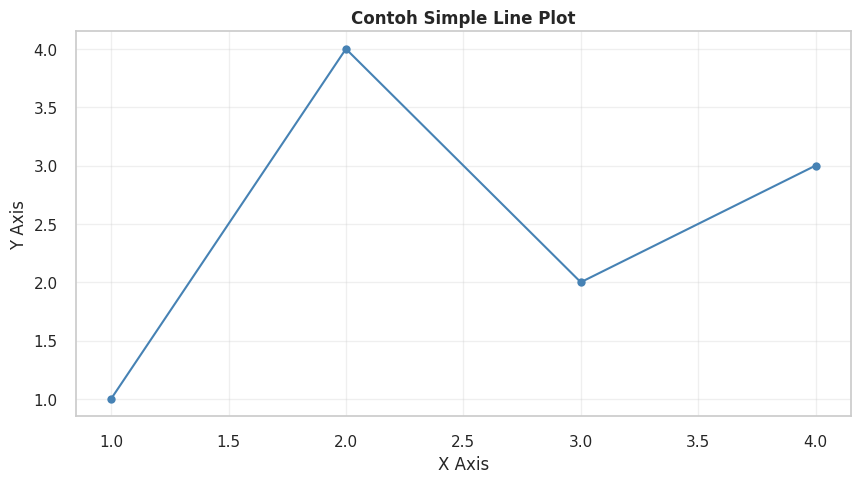

In [4]:

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot([1, 2, 3, 4], [1, 4, 2, 3], marker='o', color='steelblue')
ax.set_title('Contoh Simple Line Plot', fontweight='bold')
ax.set_xlabel('X Axis')
ax.set_ylabel('Y Axis')
ax.grid(True, alpha=0.3)
plt.show()

### 1.2 Bar Chart: Paket per Metode

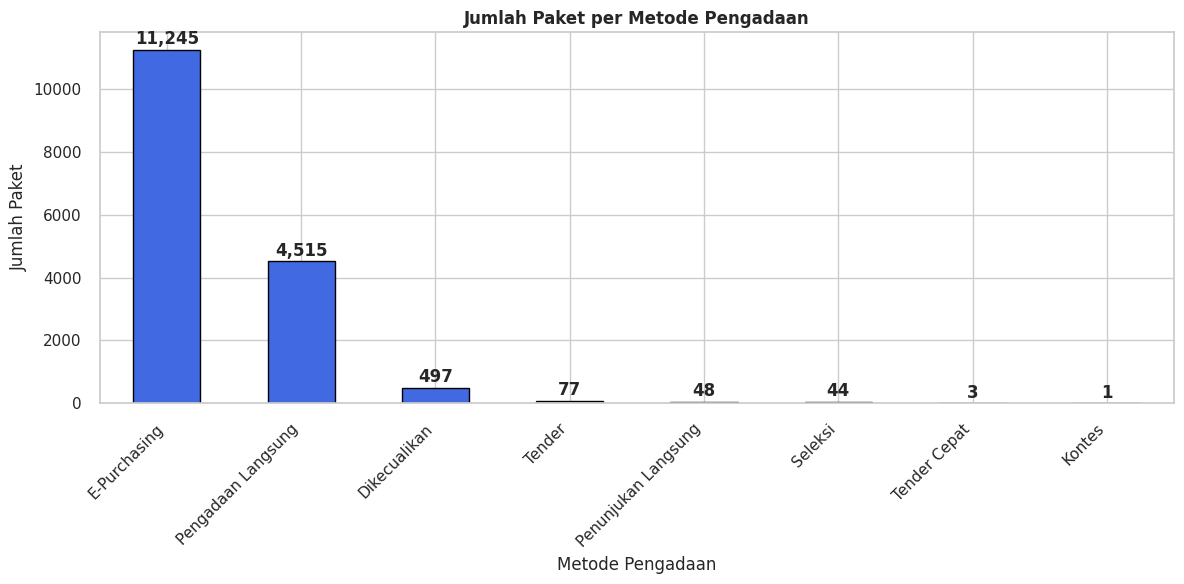

In [5]:

metode_counts = df['metode_pengadaan'].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
metode_counts.plot(kind='bar', ax=ax, color='royalblue', edgecolor='black')
ax.set_title('Jumlah Paket per Metode Pengadaan', fontweight='bold')
ax.set_xlabel('Metode Pengadaan')
ax.set_ylabel('Jumlah Paket')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
for i, v in enumerate(metode_counts):
    ax.text(i, v + 50, f"{v:,}", ha='center', va='bottom', fontweight='bold')
plt.tight_layout()
plt.show()

### 1.3 Horizontal Bar: Top 10 Satker (Total Pagu)

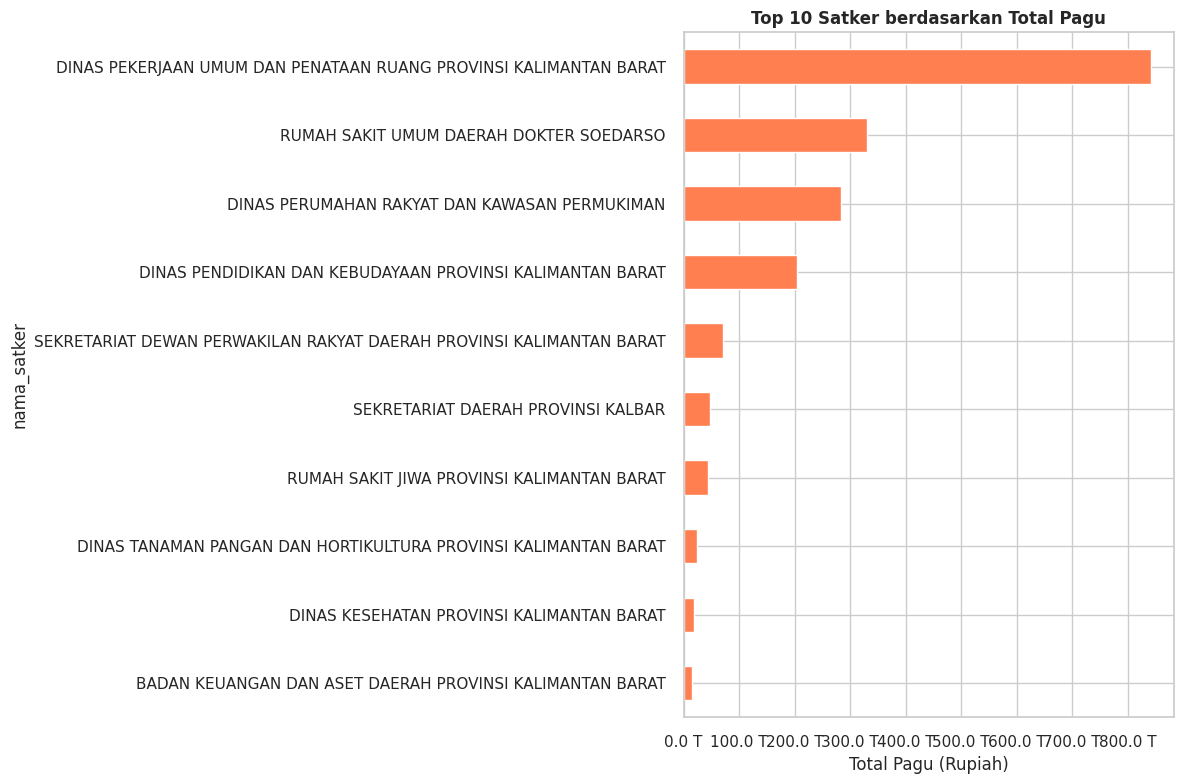

In [6]:

top_satker = (
    df.groupby('nama_satker')['pagu']
    .sum()
    .sort_values(ascending=True)
    .tail(10)
)
fig, ax = plt.subplots(figsize=(12, 8))
top_satker.plot(kind='barh', ax=ax, color='coral')
ax.set_title('Top 10 Satker berdasarkan Total Pagu', fontweight='bold')
ax.set_xlabel('Total Pagu (Rupiah)')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e9:.1f} T'))
plt.tight_layout()
plt.show()

### 1.4 Histogram dengan Mean & Median

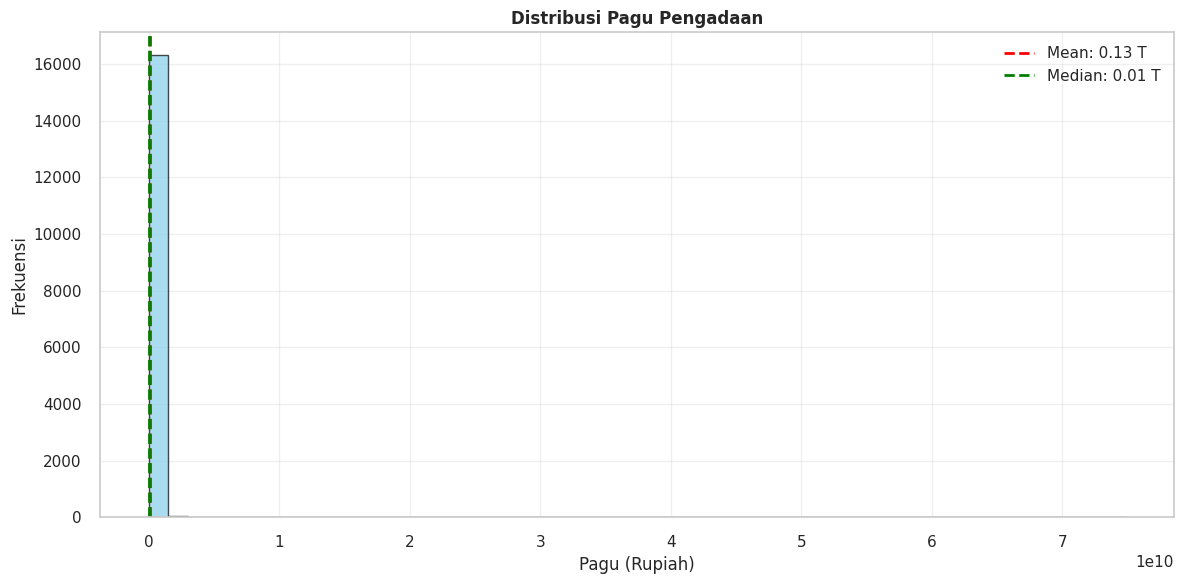

In [7]:

pagu_clean = df['pagu'].dropna()
fig, ax = plt.subplots(figsize=(12, 6))
ax.hist(pagu_clean, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
mean_val = pagu_clean.mean()
median_val = pagu_clean.median()
ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val/1e9:.2f} T')
ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val/1e9:.2f} T')
ax.set_title('Distribusi Pagu Pengadaan', fontweight='bold')
ax.set_xlabel('Pagu (Rupiah)')
ax.set_ylabel('Frekuensi')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 1.5 Pie Chart: Komposisi Metode

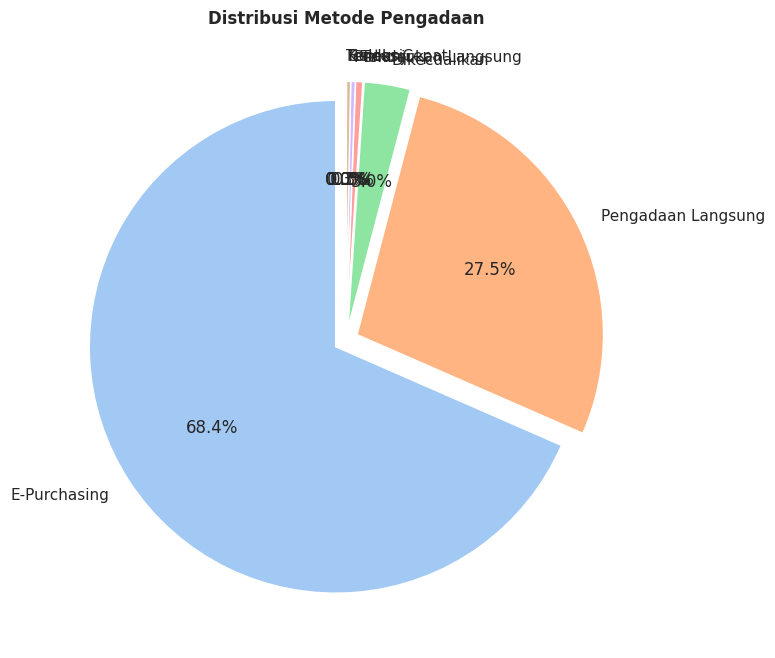

In [8]:

fig, ax = plt.subplots(figsize=(8, 8))
colors = sns.color_palette('pastel')
ax.pie(metode_counts, labels=metode_counts.index, autopct='%1.1f%%', startangle=90,
       colors=colors, explode=[0.05] * len(metode_counts))
ax.set_title('Distribusi Metode Pengadaan', fontweight='bold')
plt.show()

### 1.6 Line Chart: Trend Pengumuman Paket

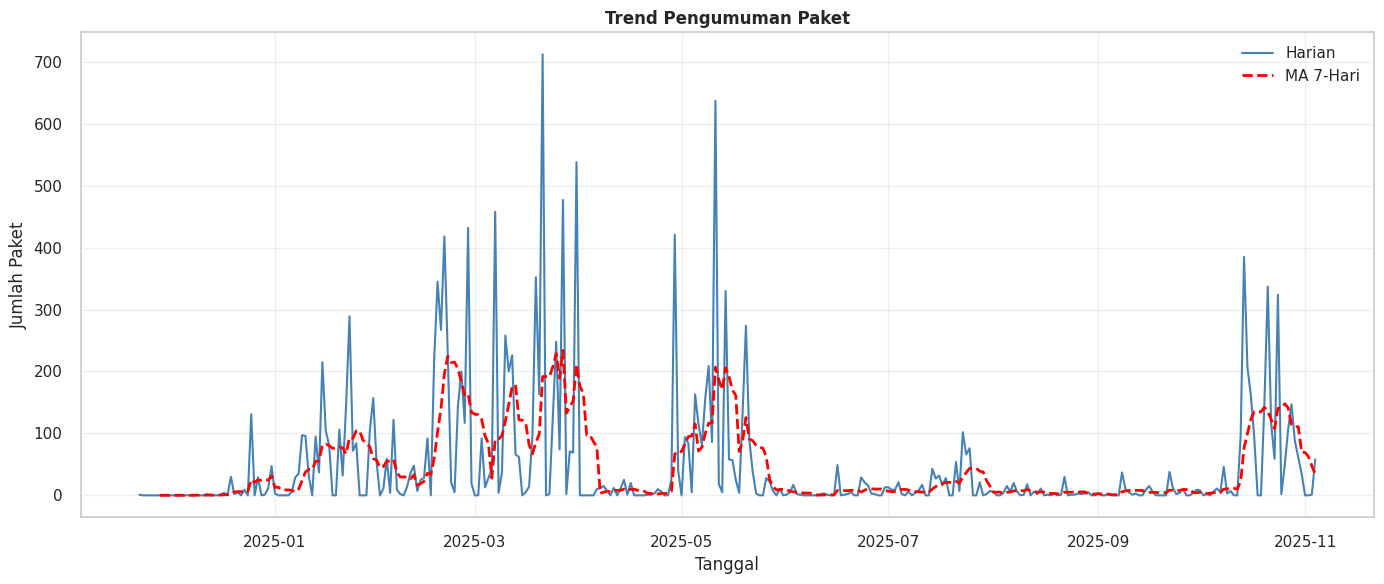

In [9]:

daily_counts = df.set_index('tgl_pengumuman_paket').resample('D').size().dropna()
rolling_7 = daily_counts.rolling(window=7).mean()
fig, ax = plt.subplots(figsize=(14, 6))
ax.plot(daily_counts.index, daily_counts.values, label='Harian', color='steelblue')
ax.plot(rolling_7.index, rolling_7.values, linestyle='--', color='red', linewidth=2, label='MA 7-Hari')
ax.set_title('Trend Pengumuman Paket', fontweight='bold')
ax.set_xlabel('Tanggal')
ax.set_ylabel('Jumlah Paket')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 2. Seaborn Statistical Plots
### 2.1 Histplot & KDE

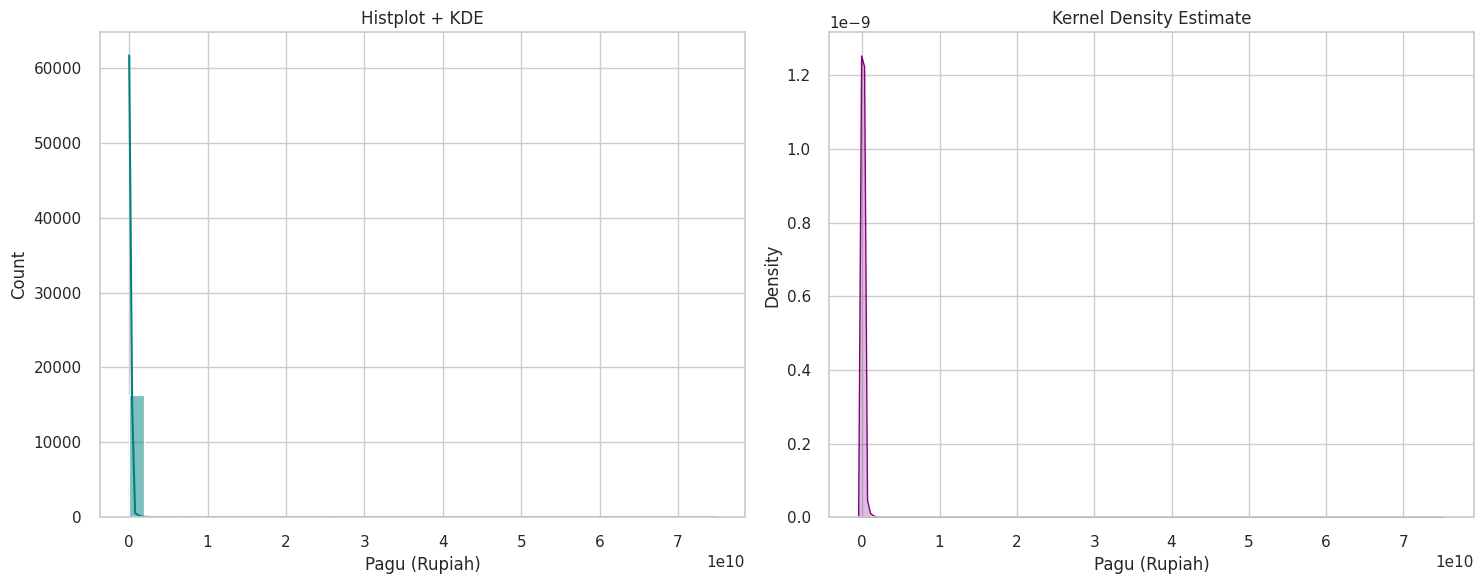

In [10]:

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(data=df, x='pagu', bins=40, kde=True, ax=axes[0], color='teal')
axes[0].set_title('Histplot + KDE')
axes[0].set_xlabel('Pagu (Rupiah)')

sns.kdeplot(data=df, x='pagu', fill=True, ax=axes[1], color='purple')
axes[1].set_title('Kernel Density Estimate')
axes[1].set_xlabel('Pagu (Rupiah)')
plt.tight_layout()
plt.show()

### 2.2 Box & Violin Plot (Metode Teratas)

In [ ]:

top_methods = df['metode_pengadaan'].value_counts().head(6).index
subset = df[df['metode_pengadaan'].isin(top_methods)].copy()
subset['pagu_miliar'] = subset['pagu'] / 1_000_000_000
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=subset, x='metode_pengadaan', y='pagu_miliar', ax=axes[0])
axes[0].set_title('Box Plot: Pagu per Metode')
axes[0].set_ylabel('Pagu (Triliun)')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

sns.violinplot(data=subset, x='metode_pengadaan', y='pagu_miliar', ax=axes[1])
axes[1].set_title('Violin Plot: Pagu per Metode')
axes[1].set_ylabel('Pagu (Triliun)')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2.3 Count Plot & Bar Plot

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.countplot(data=df, x='jenis_pengadaan', ax=axes[0], palette='Set2', order=df['jenis_pengadaan'].value_counts().index)
axes[0].set_title('Count Plot: Jenis Pengadaan')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

jenis_avg = df.groupby('jenis_pengadaan')['pagu'].mean().reset_index()
sns.barplot(data=jenis_avg, x='jenis_pengadaan', y='pagu', palette='Set2', ax=axes[1])
axes[1].set_title('Average Pagu per Jenis')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')
axes[1].set_ylabel('Average Pagu (Rupiah)')
plt.tight_layout()
plt.show()

### 2.4 Heatmap: Correlation Matrix

In [ ]:

satker_summary = (
    df.groupby('nama_satker')['pagu']
    .agg(['count', 'sum', 'mean'])
    .rename(columns={'count': 'jumlah_paket', 'sum': 'total_pagu', 'mean': 'avg_pagu'})
)
corr = satker_summary.corr()
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, linewidths=1, cbar_kws={'shrink': 0.8}, ax=ax)
ax.set_title('Correlation Matrix (Satker Summary)', fontweight='bold')
plt.tight_layout()
plt.show()

### 2.5 Scatter Plot dengan Hue & Style

In [ ]:

top_satker_counts = df['nama_satker'].value_counts().head(15).index
scatter_df = (
    df[df['nama_satker'].isin(top_satker_counts)]
    .groupby(['nama_satker', 'metode_pengadaan'])['pagu']
    .agg(['count', 'sum'])
    .reset_index()
    .rename(columns={'count': 'jumlah_paket', 'sum': 'total_pagu'})
)
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=scatter_df, x='jumlah_paket', y='total_pagu', hue='metode_pengadaan', style='metode_pengadaan',
                s=120, alpha=0.7, ax=ax)
ax.set_title('Jumlah Paket vs Total Pagu (per Metode)', fontweight='bold')
ax.set_xlabel('Jumlah Paket')
ax.set_ylabel('Total Pagu (Rupiah)')
plt.tight_layout()
plt.show()

### 2.6 Custom Theme & Palette

In [ ]:

sns.set_theme(style='darkgrid', context='talk', palette='colorblind')
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=jenis_avg, x='jenis_pengadaan', y='pagu', ax=ax)
ax.set_title('Custom Theme Example', fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

sns.set_theme(style='whitegrid', palette='husl')

## 3. Mini Dashboard (Subplots)

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Dashboard Visualisasi RUP 2025', fontsize=16, fontweight='bold')
axes[0, 0].hist(pagu_clean / 1_000_000_000, bins=30, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Distribusi Pagu (Triliun)')
axes[0, 0].set_xlabel('Pagu (T)')
axes[0, 0].set_ylabel('Frekuensi')

axes[0, 1].barh(top_satker.index[-5:], (top_satker / 1_000_000_000).tail(5), color='coral')
axes[0, 1].set_title('Top 5 Satker (Pagu)')
axes[0, 1].set_xlabel('Total Pagu (T)')

axes[1, 0].bar(metode_counts.index[:5], metode_counts.values[:5], color='mediumseagreen', edgecolor='black')
axes[1, 0].set_title('Top 5 Metode (Jumlah Paket)')
axes[1, 0].set_xticklabels(metode_counts.index[:5], rotation=45, ha='right')
axes[1, 0].set_ylabel('Jumlah Paket')
axes[1, 0].grid(axis='y', alpha=0.3)

axes[1, 1].pie(metode_counts.values[:5], labels=metode_counts.index[:5], autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Distribusi Metode (Top 5)')

plt.tight_layout()
plt.show()

## 4. Export Visualisasi

In [ ]:

output_dir = Path('../outputs')
output_dir.mkdir(parents=True, exist_ok=True)
fig, ax = plt.subplots(figsize=(8, 5))
sns.barplot(data=jenis_avg, x='jenis_pengadaan', y='pagu', palette='husl', ax=ax)
ax.set_title('Contoh Chart untuk Export')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
export_path = output_dir / 'contoh_chart_session3.png'
fig.savefig(export_path, dpi=300, bbox_inches='tight')
plt.close(fig)
print(f'✅ Chart saved to {export_path}')

## 5. Summary & Best Practices
- Matplotlib = fondasi control penuh; Seaborn = cepat & cantik
- Tambahkan judul, label sumbu, satuan, legend seperlunya
- Gunakan warna konsisten dan ramah color-blind
- Sertakan garis mean/median atau annotation untuk storytelling
- Filter outlier ekstrem sebelum plotting
- Simpan chart penting dengan resolusi tinggi (dpi≥300)

## 6. Latihan Mandiri
1. Buat histogram pagu per jenis pengadaan (gunakan facet/subplot).
2. Plot line chart multi-metode (1 garis per metode utama) + moving average.
3. Tampilkan box plot pagu per satker (top 8) lalu bandingkan dengan violin plot.
4. Bangun dashboard 2×2 versi Anda sendiri dengan chart berbeda.
5. Simpan minimal dua chart sebagai PNG dan siap dipakai di slide.

## ✅ Closing
Visualisasi yang baik menyampaikan insight dengan jelas. Gunakan notebook ini selama sesi untuk mengeksplorasi variasi chart dan styling.